# Dimensionality Reduction

## By: Mustafa Yildirim

Using all training images of four digits ('1', '3', '6', and '9') in MNIST to estimate LDA projection matrices for all possible LDA dimensions.
Using LDA to project all images into 2D and/or 3D space, and comparing its visualization with those of PCA and t-SNE.

In [ ]:
!gdown --folder https://drive.google.com/drive/folders/1r20aRjc2iu9O3kN3Xj9jNYY2uMgcERY1 2> /dev/null
!pip install python_mnist

Processing file 1Jf2XqGR7y1fzOZNKLJiom7GmZZUzXhfs t10k-images-idx3-ubyte
Processing file 1qiYu9dW3ZNrlvTFO5fI4qf8Wtr8K-pCu t10k-labels-idx1-ubyte
Processing file 1SnWvBcUETRJ53rEJozFUUo-hOQFPKxjp train-images-idx3-ubyte
Processing file 1kKEIi_pwVHmabByAnwZQsaMgro9XiBFE train-labels-idx1-ubyte


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#load MINST images
from mnist import MNIST

In [ ]:
mnist_loader = MNIST('MNIST')
train_data, train_label = mnist_loader.load_training()

train_data = np.array(train_data)
train_label = np.array(train_label)

print(train_data.shape)
print(train_label.shape)

(60000, 784)
(60000,)


In [ ]:
def my_LDA(X, y, m):

  mean_overall = np.mean(X, axis=0)

  # Unique classes
  K = np.unique(y)

  # Initializing Sw and Sb
  S_w = np.zeros((X.shape[1], X.shape[1]))
  S_b = np.zeros((X.shape[1], X.shape[1]))

  for k in K:

    X_k = X[y == k]

    # Calculating the mean of class k
    mean_k = np.mean(X_k, axis=0)

    S_k = (X_k - mean_k).T @ (X_k - mean_k)
    S_w += S_k

    n_k = X_k.shape[0]  # Number of samples in class k
    mean_diff = (mean_k - mean_overall).reshape(-1, 1)
    S_b += n_k * (mean_diff @ mean_diff.T)

  # Regularizing Sw
  S_w += np.eye(S_w.shape[0]) * 1e-4

  w, A = np.linalg.eig(np.linalg.inv(S_w) @ S_b)

  # Sorting eigen values from large to small
  idx = np.argsort(-np.abs(w))

  return np.real(w[idx[:m]]), np.transpose(np.real(A[:, idx[:m]]))

In [ ]:
# Select digits '1', '3', '6', '9'
digit_index_4 = np.logical_or(train_label == 1, train_label == 3)
digit_index_4 = np.logical_or(digit_index_4, train_label == 6)
digit_index_4 = np.logical_or(digit_index_4, train_label == 9)
X_4 = train_data[digit_index_4]
y_4 = train_label[digit_index_4]

In [ ]:
# my own LDA implementation
m2 = X_4.shape[1]
w2,A2 = my_LDA(X_4,y_4, m2)

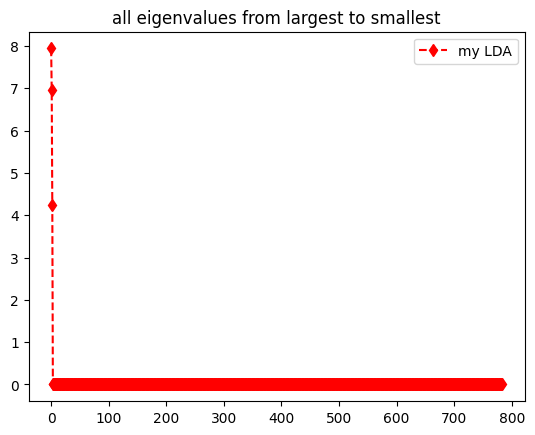

In [ ]:
plt.title('all eigenvalues from largest to smallest')
plt.plot(w2,'rd--')
plt.legend(['my LDA'])

In [ ]:
m = 3
w3,A3 = my_LDA(X_4,y_4, m)

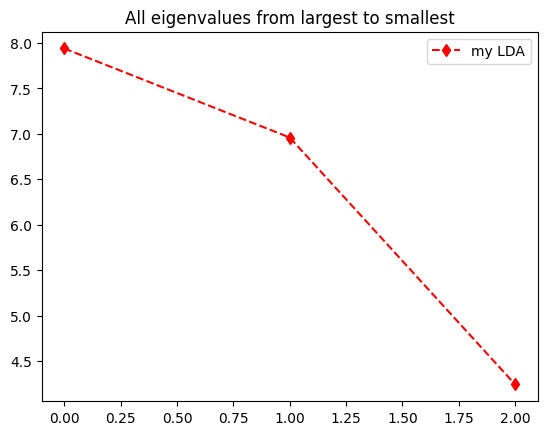

In [ ]:
plt.title('All eigenvalues from largest to smallest')
plt.plot(w3,'rd--')
plt.legend(['my LDA'])



---



Using all of the digit images (0, 1, ..., 9) to project all images into 2D and/or 3D space

In [ ]:
X_all = np.array(train_data)
y_all = np.array(train_label)

2D Figure for my LDA

In [ ]:
m = 2
w, A = my_LDA(X_all, y_all, m)
X_lda_2d = np.transpose(A @ X_all.T).real

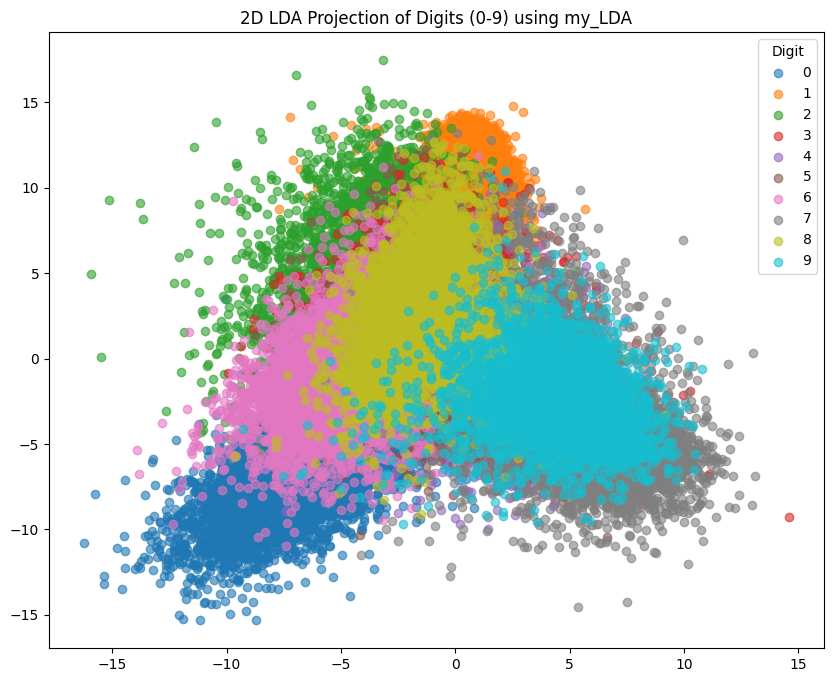

In [ ]:
plt.figure(figsize=(10, 8))
plt.title('2D LDA Projection of Digits (0-9) using my_LDA')
plt.scatter(X_lda_2d[y_all == 0, 0], X_lda_2d[y_all == 0, 1], color='#1f77b4', alpha=0.6, label='0')
plt.scatter(X_lda_2d[y_all == 1, 0], X_lda_2d[y_all == 1, 1], color='#ff7f0e', alpha=0.6, label='1')
plt.scatter(X_lda_2d[y_all == 2, 0], X_lda_2d[y_all == 2, 1], color='#2ca02c', alpha=0.6, label='2')
plt.scatter(X_lda_2d[y_all == 3, 0], X_lda_2d[y_all == 3, 1], color='#d62728', alpha=0.6, label='3')
plt.scatter(X_lda_2d[y_all == 4, 0], X_lda_2d[y_all == 4, 1], color='#9467bd', alpha=0.6, label='4')
plt.scatter(X_lda_2d[y_all == 5, 0], X_lda_2d[y_all == 5, 1], color='#8c564b', alpha=0.6, label='5')
plt.scatter(X_lda_2d[y_all == 6, 0], X_lda_2d[y_all == 6, 1], color='#e377c2', alpha=0.6, label='6')
plt.scatter(X_lda_2d[y_all == 7, 0], X_lda_2d[y_all == 7, 1], color='#7f7f7f', alpha=0.6, label='7')
plt.scatter(X_lda_2d[y_all == 8, 0], X_lda_2d[y_all == 8, 1], color='#bcbd22', alpha=0.6, label='8')
plt.scatter(X_lda_2d[y_all == 9, 0], X_lda_2d[y_all == 9, 1], color='#17becf', alpha=0.6, label='9')
plt.legend(title='Digit')
plt.show()

3D Figure for my LDA

In [ ]:
m = 3
w, A = my_LDA(X_all, y_all, m)
X_lda_3d = np.transpose(A @ X_all.T).real

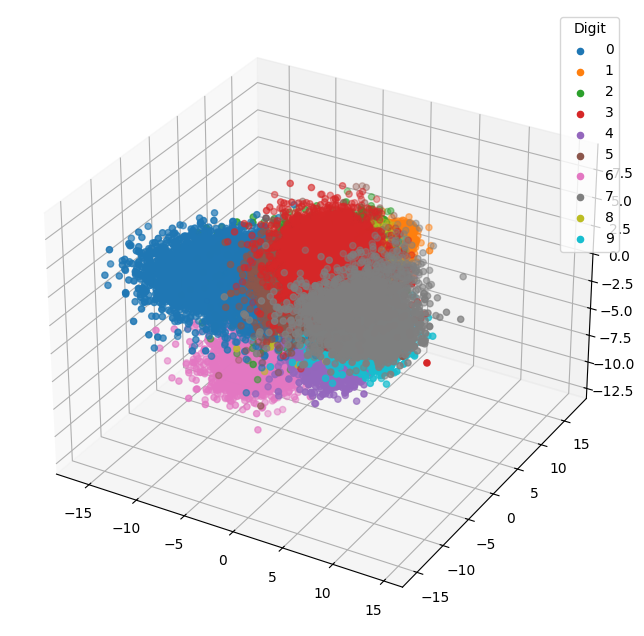

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')

ax.scatter(xs=X_lda_3d[y_all == 0, 0], ys=X_lda_3d[y_all == 0, 1], zs=X_lda_3d[y_all == 0, 2], color='#1f77b4', label='0')
ax.scatter(xs=X_lda_3d[y_all == 1, 0], ys=X_lda_3d[y_all == 1, 1], zs=X_lda_3d[y_all == 1, 2], color='#ff7f0e', label='1')
ax.scatter(xs=X_lda_3d[y_all == 2, 0], ys=X_lda_3d[y_all == 2, 1], zs=X_lda_3d[y_all == 2, 2], color='#2ca02c', label='2')
ax.scatter(xs=X_lda_3d[y_all == 3, 0], ys=X_lda_3d[y_all == 3, 1], zs=X_lda_3d[y_all == 3, 2], color='#d62728', label='3')
ax.scatter(xs=X_lda_3d[y_all == 4, 0], ys=X_lda_3d[y_all == 4, 1], zs=X_lda_3d[y_all == 4, 2], color='#9467bd', label='4')
ax.scatter(xs=X_lda_3d[y_all == 5, 0], ys=X_lda_3d[y_all == 5, 1], zs=X_lda_3d[y_all == 5, 2], color='#8c564b', label='5')
ax.scatter(xs=X_lda_3d[y_all == 6, 0], ys=X_lda_3d[y_all == 6, 1], zs=X_lda_3d[y_all == 6, 2], color='#e377c2', label='6')
ax.scatter(xs=X_lda_3d[y_all == 7, 0], ys=X_lda_3d[y_all == 7, 1], zs=X_lda_3d[y_all == 7, 2], color='#7f7f7f', label='7')
ax.scatter(xs=X_lda_3d[y_all == 8, 0], ys=X_lda_3d[y_all == 8, 1], zs=X_lda_3d[y_all == 8, 2], color='#bcbd22', label='8')
ax.scatter(xs=X_lda_3d[y_all == 9, 0], ys=X_lda_3d[y_all == 9, 1], zs=X_lda_3d[y_all == 9, 2], color='#17becf', label='9')
ax.legend(title='Digit')
plt.show()

Sklearn PCA

In [ ]:
from sklearn.decomposition import PCA

pca_2d = PCA(n_components=2)
Y_pca_2d = pca_2d.fit_transform(X_all)

2D Figure for PCA

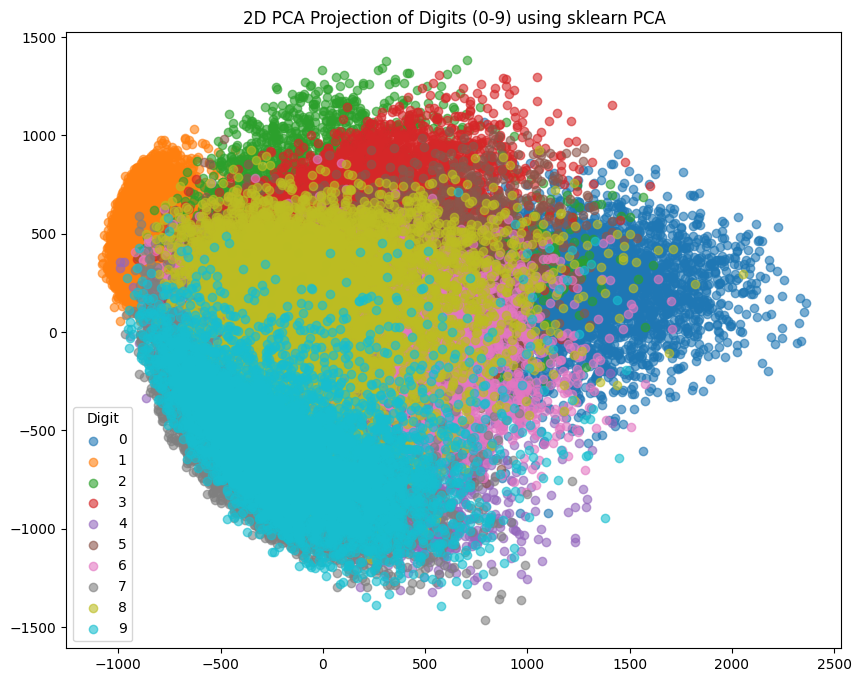

In [ ]:
plt.figure(figsize=(10, 8))
plt.title('2D PCA Projection of Digits (0-9) using sklearn PCA')

plt.scatter(Y_pca_2d[y_all == 0, 0], Y_pca_2d[y_all == 0, 1], color='#1f77b4', alpha=0.6, label='0')
plt.scatter(Y_pca_2d[y_all == 1, 0], Y_pca_2d[y_all == 1, 1], color='#ff7f0e', alpha=0.6, label='1')
plt.scatter(Y_pca_2d[y_all == 2, 0], Y_pca_2d[y_all == 2, 1], color='#2ca02c', alpha=0.6, label='2')
plt.scatter(Y_pca_2d[y_all == 3, 0], Y_pca_2d[y_all == 3, 1], color='#d62728', alpha=0.6, label='3')
plt.scatter(Y_pca_2d[y_all == 4, 0], Y_pca_2d[y_all == 4, 1], color='#9467bd', alpha=0.6, label='4')
plt.scatter(Y_pca_2d[y_all == 5, 0], Y_pca_2d[y_all == 5, 1], color='#8c564b', alpha=0.6, label='5')
plt.scatter(Y_pca_2d[y_all == 6, 0], Y_pca_2d[y_all == 6, 1], color='#e377c2', alpha=0.6, label='6')
plt.scatter(Y_pca_2d[y_all == 7, 0], Y_pca_2d[y_all == 7, 1], color='#7f7f7f', alpha=0.6, label='7')
plt.scatter(Y_pca_2d[y_all == 8, 0], Y_pca_2d[y_all == 8, 1], color='#bcbd22', alpha=0.6, label='8')
plt.scatter(Y_pca_2d[y_all == 9, 0], Y_pca_2d[y_all == 9, 1], color='#17becf', alpha=0.6, label='9')
plt.legend(title='Digit')
plt.show()

3D Figure for PCA

In [ ]:
pca_3d = PCA(n_components=3)
Y_pca_3d = pca_3d.fit_transform(X_all)

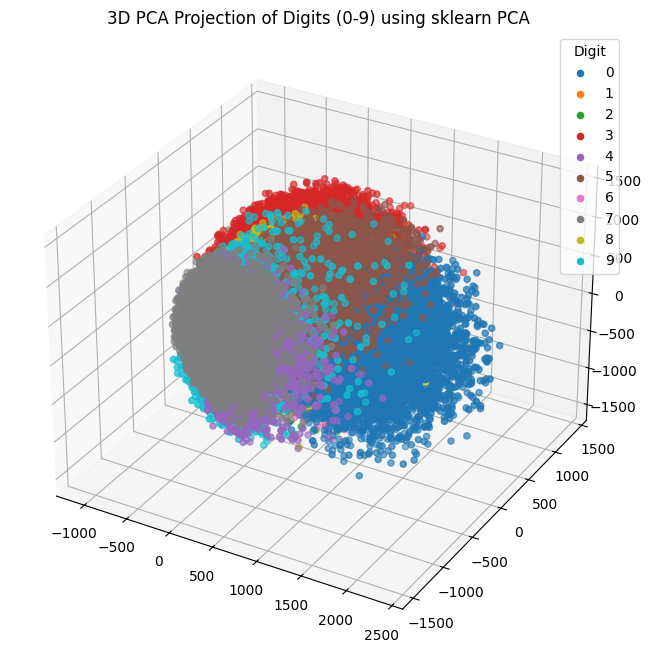

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')
ax.set_title('3D PCA Projection of Digits (0-9) using sklearn PCA')

ax.scatter(xs=Y_pca_3d[y_all == 0, 0], ys=Y_pca_3d[y_all == 0, 1], zs=Y_pca_3d[y_all == 0, 2], color='#1f77b4', label='0')
ax.scatter(xs=Y_pca_3d[y_all == 1, 0], ys=Y_pca_3d[y_all == 1, 1], zs=Y_pca_3d[y_all == 1, 2], color='#ff7f0e', label='1')
ax.scatter(xs=Y_pca_3d[y_all == 2, 0], ys=Y_pca_3d[y_all == 2, 1], zs=Y_pca_3d[y_all == 2, 2], color='#2ca02c', label='2')
ax.scatter(xs=Y_pca_3d[y_all == 3, 0], ys=Y_pca_3d[y_all == 3, 1], zs=Y_pca_3d[y_all == 3, 2], color='#d62728', label='3')
ax.scatter(xs=Y_pca_3d[y_all == 4, 0], ys=Y_pca_3d[y_all == 4, 1], zs=Y_pca_3d[y_all == 4, 2], color='#9467bd', label='4')
ax.scatter(xs=Y_pca_3d[y_all == 5, 0], ys=Y_pca_3d[y_all == 5, 1], zs=Y_pca_3d[y_all == 5, 2], color='#8c564b', label='5')
ax.scatter(xs=Y_pca_3d[y_all == 6, 0], ys=Y_pca_3d[y_all == 6, 1], zs=Y_pca_3d[y_all == 6, 2], color='#e377c2', label='6')
ax.scatter(xs=Y_pca_3d[y_all == 7, 0], ys=Y_pca_3d[y_all == 7, 1], zs=Y_pca_3d[y_all == 7, 2], color='#7f7f7f', label='7')
ax.scatter(xs=Y_pca_3d[y_all == 8, 0], ys=Y_pca_3d[y_all == 8, 1], zs=Y_pca_3d[y_all == 8, 2], color='#bcbd22', label='8')
ax.scatter(xs=Y_pca_3d[y_all == 9, 0], ys=Y_pca_3d[y_all == 9, 1], zs=Y_pca_3d[y_all == 9, 2], color='#17becf', label='9')
ax.legend(title='Digit')
plt.show()

Sklearn TSNE

In [ ]:
from sklearn.manifold import TSNE

Y_tsne_2d = TSNE(n_components=2, perplexity=20, random_state=0).fit_transform(X_all)

2D Figure for TSNE

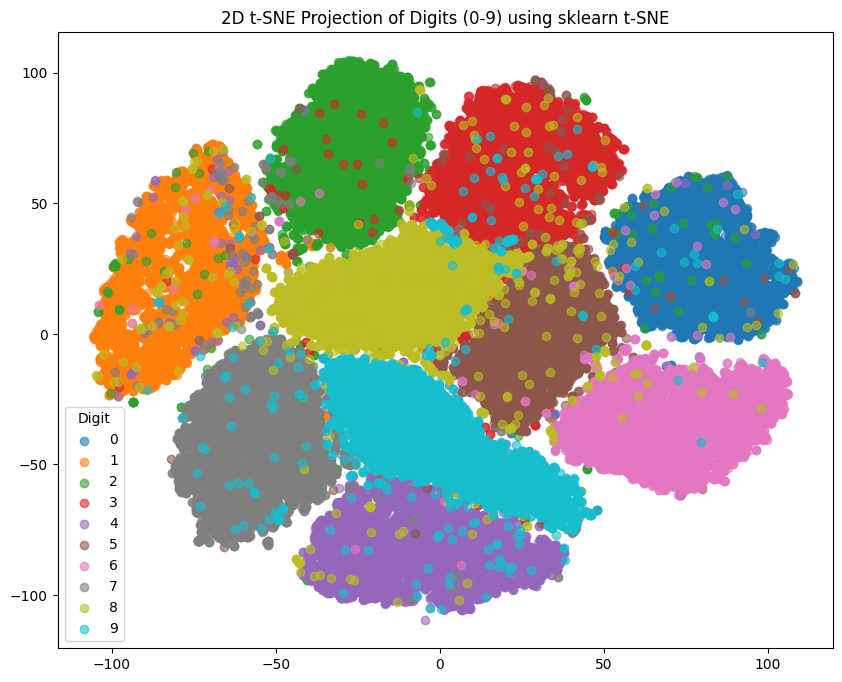

In [ ]:
plt.figure(figsize=(10, 8))
plt.title('2D t-SNE Projection of Digits (0-9) using sklearn t-SNE')

plt.scatter(Y_tsne_2d[y_all == 0, 0], Y_tsne_2d[y_all == 0, 1], color='#1f77b4', alpha=0.6, label='0')
plt.scatter(Y_tsne_2d[y_all == 1, 0], Y_tsne_2d[y_all == 1, 1], color='#ff7f0e', alpha=0.6, label='1')
plt.scatter(Y_tsne_2d[y_all == 2, 0], Y_tsne_2d[y_all == 2, 1], color='#2ca02c', alpha=0.6, label='2')
plt.scatter(Y_tsne_2d[y_all == 3, 0], Y_tsne_2d[y_all == 3, 1], color='#d62728', alpha=0.6, label='3')
plt.scatter(Y_tsne_2d[y_all == 4, 0], Y_tsne_2d[y_all == 4, 1], color='#9467bd', alpha=0.6, label='4')
plt.scatter(Y_tsne_2d[y_all == 5, 0], Y_tsne_2d[y_all == 5, 1], color='#8c564b', alpha=0.6, label='5')
plt.scatter(Y_tsne_2d[y_all == 6, 0], Y_tsne_2d[y_all == 6, 1], color='#e377c2', alpha=0.6, label='6')
plt.scatter(Y_tsne_2d[y_all == 7, 0], Y_tsne_2d[y_all == 7, 1], color='#7f7f7f', alpha=0.6, label='7')
plt.scatter(Y_tsne_2d[y_all == 8, 0], Y_tsne_2d[y_all == 8, 1], color='#bcbd22', alpha=0.6, label='8')
plt.scatter(Y_tsne_2d[y_all == 9, 0], Y_tsne_2d[y_all == 9, 1], color='#17becf', alpha=0.6, label='9')
plt.legend(title='Digit')
plt.show()

3D Figure for TSNE

In [ ]:
Y_tsne_3d = TSNE(n_components=3, perplexity=20, random_state=0).fit_transform(X_all)

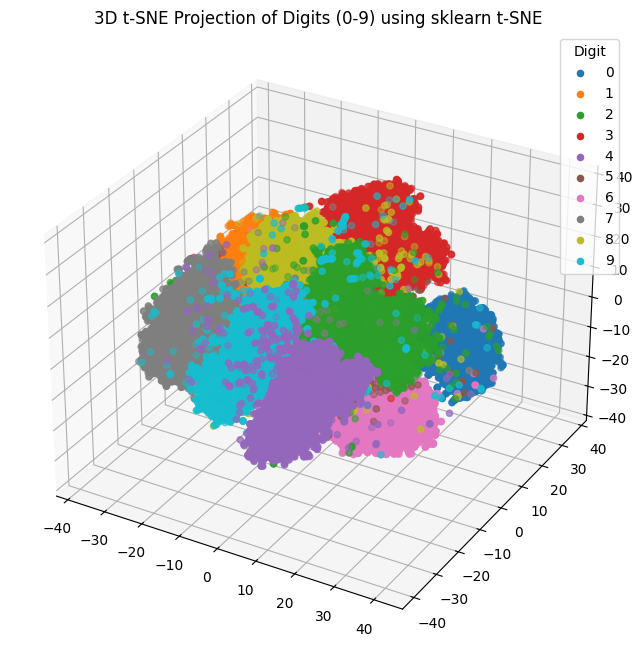

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')
ax.set_title('3D t-SNE Projection of Digits (0-9) using sklearn t-SNE')

ax.scatter(xs=Y_tsne_3d[y_all == 0, 0], ys=Y_tsne_3d[y_all == 0, 1], zs=Y_tsne_3d[y_all == 0, 2], color='#1f77b4', label='0')
ax.scatter(xs=Y_tsne_3d[y_all == 1, 0], ys=Y_tsne_3d[y_all == 1, 1], zs=Y_tsne_3d[y_all == 1, 2], color='#ff7f0e', label='1')
ax.scatter(xs=Y_tsne_3d[y_all == 2, 0], ys=Y_tsne_3d[y_all == 2, 1], zs=Y_tsne_3d[y_all == 2, 2], color='#2ca02c', label='2')
ax.scatter(xs=Y_tsne_3d[y_all == 3, 0], ys=Y_tsne_3d[y_all == 3, 1], zs=Y_tsne_3d[y_all == 3, 2], color='#d62728', label='3')
ax.scatter(xs=Y_tsne_3d[y_all == 4, 0], ys=Y_tsne_3d[y_all == 4, 1], zs=Y_tsne_3d[y_all == 4, 2], color='#9467bd', label='4')
ax.scatter(xs=Y_tsne_3d[y_all == 5, 0], ys=Y_tsne_3d[y_all == 5, 1], zs=Y_tsne_3d[y_all == 5, 2], color='#8c564b', label='5')
ax.scatter(xs=Y_tsne_3d[y_all == 6, 0], ys=Y_tsne_3d[y_all == 6, 1], zs=Y_tsne_3d[y_all == 6, 2], color='#e377c2', label='6')
ax.scatter(xs=Y_tsne_3d[y_all == 7, 0], ys=Y_tsne_3d[y_all == 7, 1], zs=Y_tsne_3d[y_all == 7, 2], color='#7f7f7f', label='7')
ax.scatter(xs=Y_tsne_3d[y_all == 8, 0], ys=Y_tsne_3d[y_all == 8, 1], zs=Y_tsne_3d[y_all == 8, 2], color='#bcbd22', label='8')
ax.scatter(xs=Y_tsne_3d[y_all == 9, 0], ys=Y_tsne_3d[y_all == 9, 1], zs=Y_tsne_3d[y_all == 9, 2], color='#17becf', label='9')
ax.legend(title='Digit')
plt.show()